## Importing the nessesary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## importing the dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#test.info()

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

## Explore the missing values

In [7]:
train.columns[train.isnull().sum()>0] # columns with missing value present 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
missing_cols = ["LotFrontage", "Alley","MasVnrType","MasVnrArea","BsmtQual","BsmtCond", "BsmtExposure",
                "BsmtFinType1","BsmtFinType2","Electrical", "FireplaceQu", "GarageType", "GarageYrBlt",
                "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence","MiscFeature"]  # List of numerical columns
for col in missing_cols:
    missing_values = train[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")

Missing values in LotFrontage: 259
Missing values in Alley: 1369
Missing values in MasVnrType: 872
Missing values in MasVnrArea: 8
Missing values in BsmtQual: 37
Missing values in BsmtCond: 37
Missing values in BsmtExposure: 38
Missing values in BsmtFinType1: 37
Missing values in BsmtFinType2: 38
Missing values in Electrical: 1
Missing values in FireplaceQu: 690
Missing values in GarageType: 81
Missing values in GarageYrBlt: 81
Missing values in GarageFinish: 81
Missing values in GarageQual: 81
Missing values in GarageCond: 81
Missing values in PoolQC: 1453
Missing values in Fence: 1179
Missing values in MiscFeature: 1406


Text(0.5, 1.0, 'MISSINGNESS IN THE DATA')

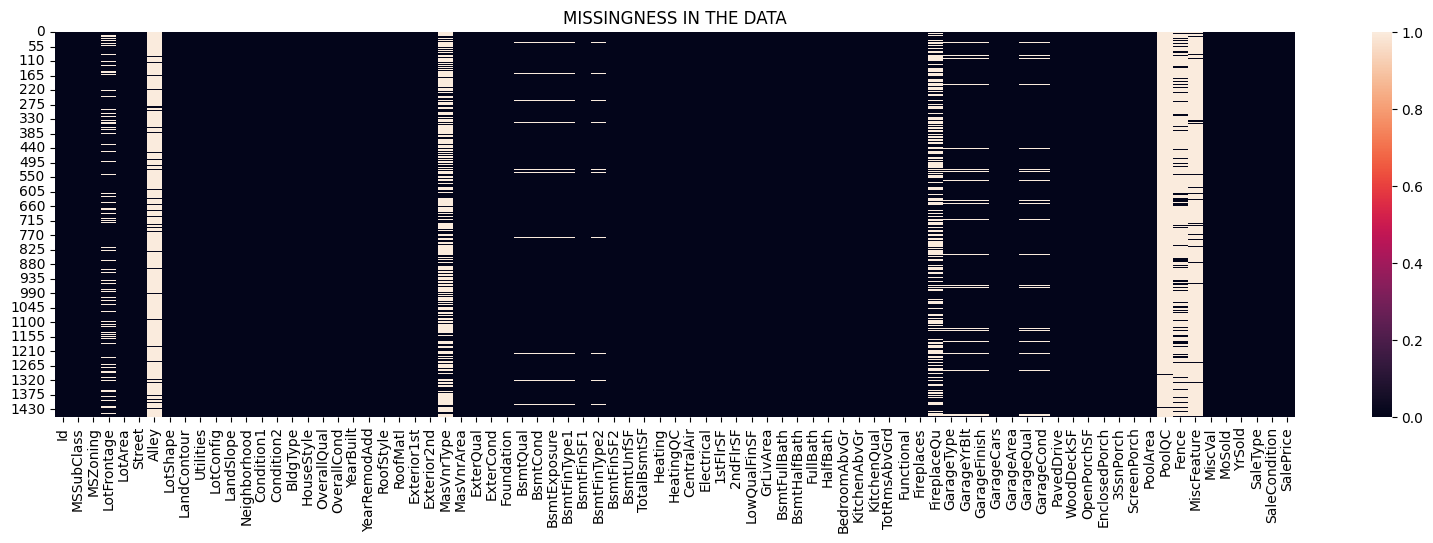

In [13]:
plt.figure(figsize=(20,5))
sns.heatmap(train.isnull())
plt.title('MISSINGNESS IN THE DATA')

## Explore all the categorical variables 

In [17]:
## get their names first 
categorical=train.select_dtypes(include=[object])
categorical.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### exploring numerical variables 

In [18]:
numerical=train.select_dtypes(include=[np.number])
#numerical.columns

In [16]:
numerical.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
